# Project 4

##### Team member: Zhihong Zhang.

## Part 1: Introduction ##

The dataset of this project is based on the the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/mushroom).
For this project, the goal is to use predictive analysis and scikit-learn to find out which attributes would best predict whether a specific mushroom is edible or not.

#### The setting up of the project

In [1]:
#starting point:import the library and data set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#reads data from the original source
mushroom = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header = None)

# data set check - make sure data was read in as expected
mushroom.head() 

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Phase 1 Data Acquisition, Data Preparation & Exploratory Data Analysis

Due to this messy type, the first thing I would like to do is to clean up the data. Also, I would like to make an assumption that whether mushroom is edible or not depends on its cap color, odor,population and habitat. 

In [2]:

#Based on assumption to create a subset of the original dataset
#gets only the relevant columns of Edibility column, cap color, odor, population, and habitat
assumption = mushroom.iloc[:,[0,3,5,21,22]].copy() 
assumption.head()

,0,3,5,21,22
0,p,n,p,s,u
1,e,y,a,n,g
2,e,w,l,n,m
3,p,w,p,s,u
4,e,g,n,a,g


In [3]:
#rename column
assumption.columns = ['Edibility', 'Cap_Color', 'Odor', 'Population','Habitat'] 
assumption.head()

,Edibility,Cap_Color,Odor,Population,Habitat
0,p,n,p,s,u
1,e,y,a,n,g
2,e,w,l,n,m
3,p,w,p,s,u
4,e,g,n,a,g


In [4]:
#check for null values
assumption.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 5 columns):
Edibility     8124 non-null object
Cap_Color     8124 non-null object
Odor          8124 non-null object
Population    8124 non-null object
Habitat       8124 non-null object
dtypes: object(5)
memory usage: 317.5+ KB


In [5]:
#checks if there are values other than 'e' or 'p'
assumption.Edibility.unique() 


array(['p', 'e'], dtype=object)

Similar check for other attributes.

In [6]:
#Only showed the habitat. Tried all attributes, but for this handin portion, only print Habitat data
#assumption.Cap_color.unique()
#assumption.Odor.unique()
#assumption.Population.unique()
assumption.Habitat.unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

As result showed, all unique category values in the columns are known. Based on this value, we then replace column values.

#### research question

### Replace column values  

In [7]:
#replace column values to edible for 'e' and poisonous for 'p'
assumption.Edibility.replace('e', 'edible', inplace = True)
assumption.Edibility.replace('p', 'poisonous', inplace = True)
assumption.head()

,Edibility,Cap_Color,Odor,Population,Habitat
0,poisonous,n,p,s,u
1,edible,y,a,n,g
2,edible,w,l,n,m
3,poisonous,w,p,s,u
4,edible,g,n,a,g


In [8]:
#replace column values for Cap_Color
assumption.Cap_Color.replace({'n': 'brown', 
                          'b': 'buff',
                          'c': 'cinnamon',
                          'g': 'gray',
                          'r': 'green',
                          'p': 'pink',
                          'u': 'purple',
                          'e': 'red',
                          'w': 'white',
                          'y': 'yellow'}, inplace = True)
#check result
assumption.head()

,Edibility,Cap_Color,Odor,Population,Habitat
0,poisonous,brown,p,s,u
1,edible,yellow,a,n,g
2,edible,white,l,n,m
3,poisonous,white,p,s,u
4,edible,gray,n,a,g


In [9]:
#replace column values for Odor
assumption.Odor.replace({'a': 'almond', 
                     'l': 'anise',
                     'c': 'creosote',
                     'y': 'fishy',
                     'f': 'foul',
                     'm': 'musty',
                     'n': 'none',
                     'p': 'pungent',
                     's': 'spicy'}, inplace = True)
assumption.head()

,Edibility,Cap_Color,Odor,Population,Habitat
0,poisonous,brown,pungent,s,u
1,edible,yellow,almond,n,g
2,edible,white,anise,n,m
3,poisonous,white,pungent,s,u
4,edible,gray,none,a,g


In [10]:
#replace column values for population
assumption.Population.replace({'a': 'abundant', 
                           'c': 'clustered',
                           'n': 'numerous',
                           's': 'scattered',
                           'v':'several',
                           'y':'solitary'}, inplace = True)
assumption.head()

,Edibility,Cap_Color,Odor,Population,Habitat
0,poisonous,brown,pungent,scattered,u
1,edible,yellow,almond,numerous,g
2,edible,white,anise,numerous,m
3,poisonous,white,pungent,scattered,u
4,edible,gray,none,abundant,g


In [11]:
#replace column values for habitat
assumption.Habitat.replace({'u': 'urban', 
                           'g': 'grasses',
                           'm': 'meadows',
                           'd': 'woods',
                           'p':'paths',
                           'w':'waste',
                        'l':'leaves'
                           }, inplace = True)
assumption.head()

,Edibility,Cap_Color,Odor,Population,Habitat
0,poisonous,brown,pungent,scattered,urban
1,edible,yellow,almond,numerous,grasses
2,edible,white,anise,numerous,meadows
3,poisonous,white,pungent,scattered,urban
4,edible,gray,none,abundant,grasses


## Part 2: Data Summary

Before we start data analysis,

The selected dataset now contains 8124 rows and 5 attributes. These attributes are:



- Edibility: Indicator shoow whether mushroom is edible or not.It is categorical/ordinal.

- Cap_Color: The cap color of mushroom . It is categorical/regular.

- Odor: The mushroom smell. It is categorical/regular.

- Population: population of mushroom. It is categorical/regular. 

- Habitat: The place where mushroom grow. It is categorical/regular. 



## Part 3: Exploratory Data Analysis (EDA) 

To explore the data, I firstly need to make sure how dimensions are distributed in the data set. Due to the possibility that data set is not evenly distributed into two kind of mushroom (which means that one kind of mushroom will have more ) To make comparision, this situation of sample size needs to be taken into account. To get start, I use groupby function to know the quantative stats for the numerical variables.

In [12]:
samplesize_edible = assumption.groupby(['Edibility']).size().to_frame('Count') #counts distribution of mushrooms (edible or not?)
samplesize_edible

,Count
Edibility,
edible,4208
poisonous,3916


There are 8124 rows among these data set. Also based on this sample edibility distribution, we can see that the data is well distributed. We can say this data set is quite well-balanced. 

Similarly, we can use this method for other attributes. 

In [13]:
#counts mushrooms by cap_color
samplesize_capcol = assumption.groupby(['Cap_Color']).size().to_frame('Count') 
samplesize_capcol.sort_values(by='Count',ascending=False,inplace=True)
samplesize_capcol

,Count
Cap_Color,
brown,2284
gray,1840
red,1500
yellow,1072
white,1040
buff,168
pink,144
cinnamon,44
green,16


In [14]:
#counts mushrooms by odor
samplesize_odor = assumption.groupby(['Odor']).size().to_frame('Count') 
samplesize_odor.sort_values(by='Count',ascending=False,inplace=True)
samplesize_odor

,Count
Odor,
none,3528
foul,2160
fishy,576
spicy,576
almond,400
anise,400
pungent,256
creosote,192
musty,36


In [15]:
#counts mushrooms by population
samplesize_pop = assumption.groupby(['Population']).size().to_frame('Count') 
samplesize_pop.sort_values(by='Count',ascending=False,inplace=True)
samplesize_pop

,Count
Population,
several,4040
solitary,1712
scattered,1248
numerous,400
abundant,384
clustered,340


In [16]:
#counts mushrooms by habitat
samplesize_hab = assumption.groupby(['Habitat']).size().to_frame('Count') 
samplesize_hab.sort_values(by='Count',ascending=False,inplace=True)
samplesize_hab

,Count
Habitat,
woods,3148
grasses,2148
paths,1144
leaves,832
urban,368
meadows,292
waste,192


#### Attribute count:edibility, capcolor,odor,population,habitat

Text(0.5, 1.0, 'Edible vs. Poisonous Mushroom Distribution')

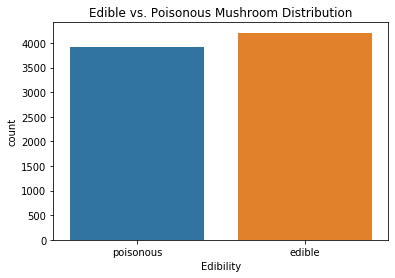

In [17]:

#  plot edibility
sns.countplot(x='Edibility',data=assumption); #plots distribution of whether mushroom is edible or not

# give the plot a title
plt.title('Edible vs. Poisonous Mushroom Distribution')

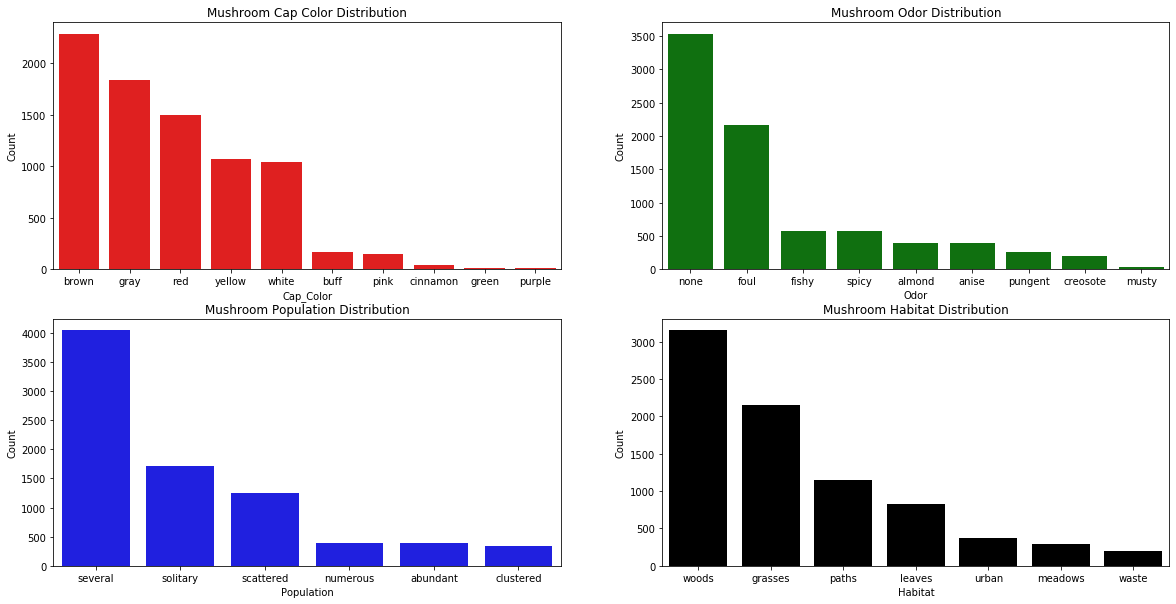

In [18]:
#similarly, plot all four other attributes.

# define a new figure for plotting
plt.figure(figsize=(20,10))


 
#plot Cap Color Distribution
# subplot ('122' = 1x2, position 2)
plt.subplot(221)
sns.barplot(x=samplesize_capcol.index,y='Count',data=samplesize_capcol,color='red'); #plots distribution of mushroom by cap color

# give the plot a title
plt.title('Mushroom Cap Color Distribution');

#plot odor Distribution
plt.subplot(222)
sns.barplot(x=samplesize_odor.index,y='Count',data=samplesize_odor,color='green'); #plots distribution of mushroom by odor

# give the plot a title
plt.title('Mushroom Odor Distribution');

#plot population Distribution
plt.subplot(223)
sns.barplot(x=samplesize_pop.index,y='Count',data=samplesize_pop,color='blue'); #plots distribution of mushroom by population

# give the plot a title
plt.title('Mushroom Population Distribution');

#plot habitat Distribution
plt.subplot(224)
sns.barplot(x=samplesize_hab.index,y='Count',data=samplesize_hab,color='black'); #plots distribution of mushroom by population

# give the plot a title
plt.title('Mushroom Habitat Distribution');

Based on these bar charts, the findings are as follows:
- About half (or a bit more,52%) of mushrooms are edible.
- About half of mushroom are distributed in several 
- Majority of mushroom(More than half) are in woods or grasses.
- More than 40 % of mushroom does not have any odor. 


I would like to know how edibility distributed in these four attributes. 

In [19]:
#create a dataframe to calculate count of mushrooms by Edibility and Cap Color
Edibility_capcol = assumption.groupby(['Edibility','Cap_Color'],as_index=False)['Odor'].count()
Edibility_capcol.rename(columns={'Odor':'Count'},inplace=True)
Edibility_capcol

,Edibility,Cap_Color,Count
0,edible,brown,1264
1,edible,buff,48
2,edible,cinnamon,32
3,edible,gray,1032
4,edible,green,16
5,edible,pink,56
6,edible,purple,16
7,edible,red,624
8,edible,white,720
9,edible,yellow,400


In [20]:
#creates dataframe to merge total count of mushrooms by Edibility and cap color by Edibility 
Edibility_capcol = pd.merge(Edibility_capcol,samplesize_capcol,on=['Cap_Color'],how='outer', suffixes=('_edib_capcol','_total'))
Edibility_capcol

,Edibility,Cap_Color,Count_edib_capcol,Count_total
0,edible,brown,1264,2284
1,poisonous,brown,1020,2284
2,edible,buff,48,168
3,poisonous,buff,120,168
4,edible,cinnamon,32,44
5,poisonous,cinnamon,12,44
6,edible,gray,1032,1840
7,poisonous,gray,808,1840
8,edible,green,16,16
9,edible,pink,56,144


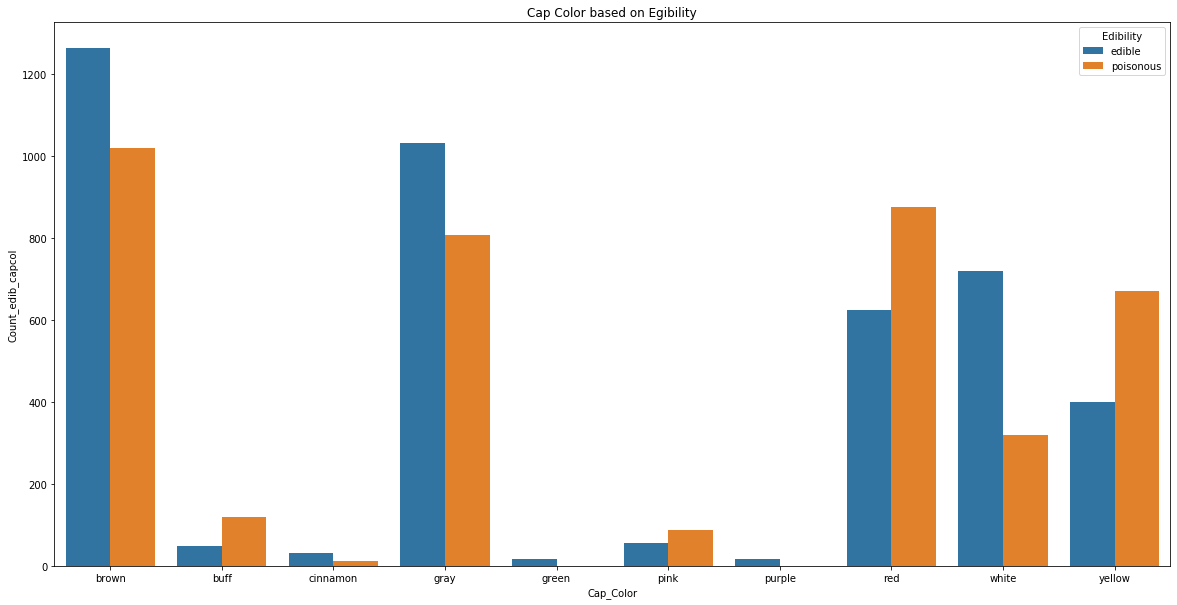

In [21]:
# define a new figure for plotting
plt.figure(figsize=(20,10))

#plots mushroom dataset by cap color and whether it is edible based on count
sns.barplot(x='Cap_Color',y='Count_edib_capcol', hue='Edibility',data=Edibility_capcol);

# give the plot a title
plt.title('Cap Color based on Egibility');

Due to the fact that it is hard to measure the difference based on count. I decided to make plots in percentage scale. To start, add the percentage scale on the column

In [22]:
#add column Percentage to calculate percentage of mushrooms by cap color and Edibility 
Edibility_capcol['Percentage'] = (Edibility_capcol['Count_edib_capcol'] / Edibility_capcol['Count_total']) * 100
Edibility_capcol

,Edibility,Cap_Color,Count_edib_capcol,Count_total,Percentage
0,edible,brown,1264,2284,55.341506
1,poisonous,brown,1020,2284,44.658494
2,edible,buff,48,168,28.571429
3,poisonous,buff,120,168,71.428571
4,edible,cinnamon,32,44,72.727273
5,poisonous,cinnamon,12,44,27.272727
6,edible,gray,1032,1840,56.086957
7,poisonous,gray,808,1840,43.913043
8,edible,green,16,16,100.000000
9,edible,pink,56,144,38.888889


I used similar method for these four attributes. And plot all four plots in one big plot.

In [23]:
#for odor
#create a dataframe to calculate count of mushrooms by Edibility and Odor
Edibility_odor =assumption.groupby(['Edibility','Odor'],as_index=False)['Cap_Color'].count()
Edibility_odor.rename(columns={'Cap_Color':'Count'},inplace=True)
#merge total count of mushrooms by Edibility and odor by Edibility 
Edibility_odor= pd.merge(Edibility_odor,samplesize_odor,on=['Odor'],how='outer', suffixes=('_edib_odor','_total'))
#add column Percent to calculate percentage of mushrooms by odor and Edibility 
Edibility_odor['Percentage'] = (Edibility_odor['Count_edib_odor'] / Edibility_odor['Count_total']) * 100
Edibility_odor

,Edibility,Odor,Count_edib_odor,Count_total,Percentage
0,edible,almond,400,400,100.000000
1,edible,anise,400,400,100.000000
2,edible,none,3408,3528,96.598639
3,poisonous,none,120,3528,3.401361
4,poisonous,creosote,192,192,100.000000
5,poisonous,fishy,576,576,100.000000
6,poisonous,foul,2160,2160,100.000000
7,poisonous,musty,36,36,100.000000
8,poisonous,pungent,256,256,100.000000
9,poisonous,spicy,576,576,100.000000


In [24]:
#for population
#create a dataframe to calculate count of mushrooms by Edibility and pop
Edibility_pop =assumption.groupby(['Edibility','Population'],as_index=False)['Cap_Color'].count()
Edibility_pop.rename(columns={'Cap_Color':'Count'},inplace=True)
# merge total count of mushrooms by Edibility and population
Edibility_pop= pd.merge(Edibility_pop,samplesize_pop,on=['Population'],how='outer', suffixes=('_edib_pop','_total'))
#add column Percent to calculate percentage of mushrooms by population and Edibility 
Edibility_pop['Percentage'] = (Edibility_pop['Count_edib_pop'] / Edibility_pop['Count_total']) * 100
Edibility_pop

,Edibility,Population,Count_edib_pop,Count_total,Percentage
0,edible,abundant,384,384,100.000000
1,edible,clustered,288,340,84.705882
2,poisonous,clustered,52,340,15.294118
3,edible,numerous,400,400,100.000000
4,edible,scattered,880,1248,70.512821
5,poisonous,scattered,368,1248,29.487179
6,edible,several,1192,4040,29.504950
7,poisonous,several,2848,4040,70.495050
8,edible,solitary,1064,1712,62.149533
9,poisonous,solitary,648,1712,37.850467


In [25]:
#for habitat
#create a dataframe to calculate count of mushrooms by Edibility and pop
Edibility_hab =assumption.groupby(['Edibility','Habitat'],as_index=False)['Cap_Color'].count()
Edibility_hab.rename(columns={'Cap_Color':'Count'},inplace=True)
# merge total count of mushrooms by Edibility and habitat
Edibility_hab= pd.merge(Edibility_hab,samplesize_hab,on=['Habitat'],how='outer', suffixes=('_edib_hab','_total'))
#add column Percent to calculate percentage of mushrooms by population and Edibility 
Edibility_hab['Percentage'] = (Edibility_hab['Count_edib_hab'] / Edibility_hab['Count_total']) * 100
Edibility_hab

,Edibility,Habitat,Count_edib_hab,Count_total,Percentage
0,edible,grasses,1408,2148,65.549348
1,poisonous,grasses,740,2148,34.450652
2,edible,leaves,240,832,28.846154
3,poisonous,leaves,592,832,71.153846
4,edible,meadows,256,292,87.671233
5,poisonous,meadows,36,292,12.328767
6,edible,paths,136,1144,11.888112
7,poisonous,paths,1008,1144,88.111888
8,edible,urban,96,368,26.086957
9,poisonous,urban,272,368,73.913043


After geting enough data, we can plot all four attributes based on edibility. 

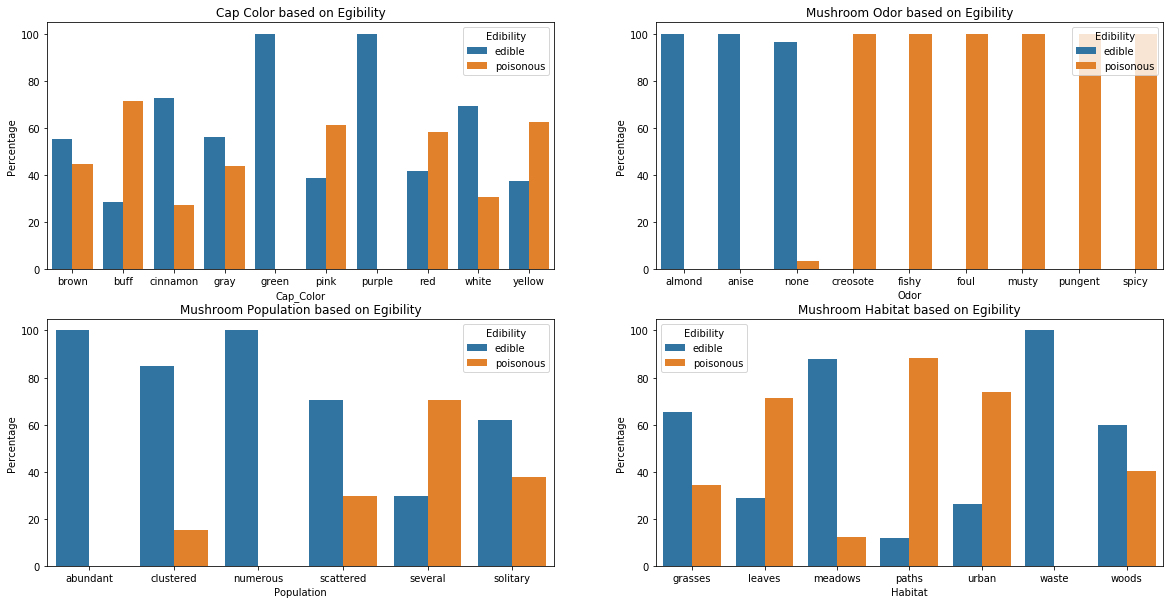

In [26]:
#plot all four attributes based on edibility
# define a new figure for plotting
plt.figure(figsize=(20,10))


#plot Cap Color Distribution

plt.subplot(221)
#plots mushroom dataset by cap color and whether it is edible based on count
sns.barplot(x='Cap_Color',y='Percentage', hue='Edibility',data=Edibility_capcol);

# give the plot a title
plt.title('Cap Color based on Egibility');



#plot odor Distribution
plt.subplot(222)
#plots mushroom dataset by cap color and whether it is edible based on count
sns.barplot(x='Odor',y='Percentage', hue='Edibility',data=Edibility_odor);
# give the plot a title
plt.title('Mushroom Odor based on Egibility');
 
plt.subplot(223)
#plot population Distribution
#plots mushroom dataset by cap color and whether it is edible based on count
sns.barplot(x='Population',y='Percentage', hue='Edibility',data=Edibility_pop);
# give the plot a title
plt.title('Mushroom Population based on Egibility');
 

#plot habitat Distribution
plt.subplot(224)
#plots mushroom dataset by cap color and whether it is edible based on count
sns.barplot(x='Habitat',y='Percentage', hue='Edibility',data=Edibility_hab);
# give the plot a title
plt.title('Mushroom Habitat based on Egibility');
 

### Some insights and findings based on the plots:###
- Cap_Color is not a good predictor. Although both green and purple mushrooms,whose color are rare,are edible,   for common colormushroom , such as brown mushroom ,is about 50% chance to get poison. Also, In many category, ratio between edible and poisonous is so close to 1. It means that it is very risky to choose.

- odor is a very good indicator. The smell is distinguishing, and it gave a clear bundary between edible and poision mushroom. Even in none odir category, there is less than 5 percent chance to get poisionous mushroom. 
- mushroon population is a fine predictor. Based on the chart, mushroom grow in abdundantt or numerous are all edible. Most mushroom in a clustered, scattered, and solitary category are more likely to be edible. And mushroom is very likely to be poisonous in several category. 

- Similar to population, habitat is a fine predictor. Interestingly,it is sort of anti-intuition,  all the mushroom grow in waste is edible.  Also, the mushroom grow in meadows and grasses are likely to be edible. Mushroom grows on leaves, paths and urban are very likely to be poisonous. Mushroom grows in woods is likely to be edible but the ratio is close( 60% vs 40%)


Before I start to use scikit-learn package. I need to convert the edibility indicator into binary.

In [27]:
#make a copy for the selected data

prediction= assumption.copy()
#replaces Edibility values to 1 if it is 'edible' and 0 for poisonous
prediction. Edibility.replace('edible', 1, inplace = True)
prediction.Edibility.replace('poisonous', 0, inplace = True)
prediction.head()

,Edibility,Cap_Color,Odor,Population,Habitat
0,0,brown,pungent,scattered,urban
1,1,yellow,almond,numerous,grasses
2,1,white,anise,numerous,meadows
3,0,white,pungent,scattered,urban
4,1,gray,none,abundant,grasses


## Phase 2 Build Predictive Models

In [28]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

After import needed package, I firstly created dummy variables. 

In [29]:
#creates dummy variables for the predictor variables
prediction_dummies = pd.get_dummies(prediction)
prediction_dummies.head()

,Edibility,Cap_Color_brown,Cap_Color_buff,Cap_Color_cinnamon,Cap_Color_gray,Cap_Color_green,Cap_Color_pink,Cap_Color_purple,Cap_Color_red,Cap_Color_white,...,Population_scattered,Population_several,Population_solitary,Habitat_grasses,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Since we know that about 50% of the mushroom in the training set is edible. The goal is to get accuracy more than 60%.

### Logistic Regression Modelling:

#### Create Model

Based on prior knowledge from phase one,odor is the best indicater to use. Population and Habitat are the fine indicator to use. Therefore one basic model is based on odor only. Then I would like to do an combination with population and odor or combination with habitat and odor. To reduce the possibility of overfitting data, I use only 40% of data to train and use the remaining for testing. 

In [30]:
#model for oder only
odor_model= [ 'Odor_almond' , 'Odor_anise'  , 'Odor_creosote'  , 'Odor_fishy'  ,'Odor_foul'  ,'Odor_musty' 
            ,'Odor_none','Odor_pungent'  , 'Odor_spicy' ]
X = prediction_dummies[odor_model].values
y = prediction_dummies['Edibility'].values

#use 40% data to train
#has a fixed state number 22 to make sure result is fixed , 22 is my lucky number 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=22)

#define the model type as logistic regression
model = LogisticRegression()

#train the algorithm
model.fit(X_train, y_train)



# calculate the accuracy of the model relative to the training data set
model.score(X_train, y_train)

/home/zhihongzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9892274546014158

In [31]:
#model for oder and population
odor_popmodel= [ 'Odor_almond' , 'Odor_anise'  , 'Odor_creosote'  , 'Odor_fishy'  ,'Odor_foul'  ,'Odor_musty' 
            ,'Odor_none','Odor_pungent'  , 'Odor_spicy'  ,'Population_abundant' ,'Population_clustered' 
             , 'Population_numerous'  ,'Population_scattered'  ,'Population_several' ,'Population_solitary' ]
X1 = prediction_dummies[odor_popmodel].values
y1 = prediction_dummies['Edibility'].values

#use 40% data to train
#has a fixed state number 22 to make sure result is fixed , 22 is my lucky number 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.6, random_state=22)


#define the model type as logistic regression
model1 = LogisticRegression()

#train the algorithm
model1.fit(X1_train, y1_train)

# calculate the accuracy of the model relative to the training data set
model1.score(X1_train, y1_train)


/home/zhihongzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9892274546014158

In [32]:
#model for oder and habitat
odor_habmodel= [ 'Odor_almond' , 'Odor_anise'  , 'Odor_creosote'  , 'Odor_fishy'  ,'Odor_foul'  ,'Odor_musty' 
            ,'Odor_none','Odor_pungent'  , 'Odor_spicy'  ,'Habitat_grasses' ,'Habitat_leaves' 
             , 'Habitat_meadows'  ,'Habitat_paths','Habitat_urban' ,'Habitat_waste','Habitat_woods' ]
X2 = prediction_dummies[odor_popmodel].values
y2 = prediction_dummies['Edibility'].values

#use 40% data to train
#has a fixed state number 22 to make sure result is fixed , 22 is my lucky number 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.6, random_state=22)


#define the model type as logistic regression
model2 = LogisticRegression()

#train the algorithm
model2.fit(X2_train, y2_train)

           

# calculate the accuracy of the model relative to the training data set
model2.score(X2_train, y2_train)



/home/zhihongzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9892274546014158

Based on the model1 and model 2, there is no difference to the original model,then we combine three model together.

In [33]:
#

combined_model= [ 'Odor_almond' , 'Odor_anise'  , 'Odor_creosote'  , 'Odor_fishy'  ,'Odor_foul'  ,'Odor_musty' 
            ,'Odor_none','Odor_pungent'  , 'Odor_spicy','Population_abundant' ,'Population_clustered' 
             , 'Population_numerous'  ,'Population_scattered' ,'Population_several' ,'Population_solitary' ,'Habitat_grasses' ,'Habitat_leaves' 
             , 'Habitat_meadows'  ,'Habitat_paths','Habitat_urban' ,'Habitat_waste','Habitat_woods' ]
X3 = prediction_dummies[combined_model].values
y3 = prediction_dummies['Edibility'].values

#use 40% data to train
#has a fixed state number 22 to make sure result is fixed , 22 is my lucky number 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.6, random_state=22)


#define the model type as logistic regression
model3 = LogisticRegression()

#train the algorithm
model3.fit(X3_train, y3_train)

           

# calculate the accuracy of the model relative to the training data set
model3.score(X3_train, y3_train)

/home/zhihongzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9929208987380732

The result above shows that adding only population or habitat to the original odor model does not increase or decrease the accuracy of the original model. But when both attributes are combined to original mode, the accuracy does increase. As the result showed,the combination of three attributes provided a 0.9929 accuracy for the training model, which is very good. 

#### Test Data ####
After get tranning data, I also need to validate the model.
Thease time, I only test base odor model and the combination model.

In [34]:
#odor only model
# predict class labels for the test set
predicted = model.predict(X_test)
print (predicted)
# generate class probabilities
probs = model.predict_proba(X_test)
print (probs)

# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

[0 1 1 ... 0 1 1]
[[0.99545403 0.00454597]
 [0.02881995 0.97118005]
 [0.03009178 0.96990822]
 ...
 [0.99545403 0.00454597]
 [0.02881995 0.97118005]
 [0.02881995 0.97118005]]
0.9825641025641025
0.9818058199802603


In [35]:
#combination model
# predict class labels for the test set
predicted3 = model3.predict(X3_test)
print (predicted3)
# generate class probabilities
probs3 = model3.predict_proba(X3_test)
print (probs3)

# generate evaluation metrics
print (metrics.accuracy_score(y3_test, predicted3))
print (metrics.roc_auc_score(y3_test, probs[:, 1]))

[0 1 1 ... 0 1 1]
[[9.94498882e-01 5.50111812e-03]
 [8.49037773e-03 9.91509622e-01]
 [6.61627109e-03 9.93383729e-01]
 ...
 [9.99430636e-01 5.69363895e-04]
 [3.24464098e-03 9.96755359e-01]
 [4.23423547e-02 9.57657645e-01]]
0.9874871794871795
0.9818058199802603


##### Result:

Based on these tested results, the accuracies are both close to 0.98, which are good. I would like to conclude that the model increase a little bit in combination model with 40 % trainning data. 

## Part 5: Conclusion and Future Improvement

By answering the research question and explore various properties of data, in my opinion, Odor is the most important attributes for determine the mushroom is edible or not. Habitat and population is related and combination can provide a better prediction. 
 
For the future improvement, on the phase 2, I think naive bayes is good for modeling. Bayesian models can provide a nice result if the suitable prior was put in the model.  

In addition, other physical attributes of the mushroom can also be used to find what kind of attributes will yield better accuracy. Due to time manner and the limited of domain knowledge, there is very limited attributes are chosen in these data analysis.  

## References ##
1. https: https://archive.ics.uci.edu/ml/datasets/mushroom
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
4. https: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

